<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRPuCl72q5-misMtB7Lvit9uodiEhjGtfZmm3Sb5y7wC26X2XhP" width="450px" height="450px"/> 

<img src="https://pbs.twimg.com/profile_images/679147586746322946/RQ78ao4T_400x400.png" width="50px" height="50px"/>

<img src="https://qph.fs.quoracdn.net/main-qimg-7c9b7670c90b286160a88cb599d1b733" width="450px" height="450px"/>

# K-Means Clustering vs. Logistic Regression

## Contents
1. [Introduction:](#1)
1. [Imports:](#2)
1. [Read the Data:](#3)
1. [Exploration:](#4)
1. [Encoding:](#5)
1. [Cluster Analysis:](#6)
1. [Classification:](#7)
1. [Model Evaluation:](#8)
1. [Verdict](#9)
1. [Closing Remarks:](#10)

<a id="1"> 
## 1. Introduction:

In this notebook, we will be comparing two very different machine learning models on the [Mushroom Classification Dataset](https://www.kaggle.com/uciml/mushroom-classification) for the task of predicting whether a given mushroom is **<font color="purple">poisonous</font>** or **<font color="green">edible</font>**. 

The first model will be [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression) without any parameter tuning, and the second model will be [K-Means Clustering](https://en.wikipedia.org/wiki/K-means_clustering).

But how exactly does one go about comparing a [Supervised Learning](https://en.wikipedia.org/wiki/Supervised_learning) Algorithm to an [Unsupervised Learning](https://en.wikipedia.org/wiki/Unsupervised_learning) Algorithm (especially when it comes to the task of [binary classification](https://en.wikipedia.org/wiki/Binary_classification))? 

As usual, for the Supervised Learning Algorithm (Logistic Regression), we will simply train the model on 80% of the mushroom data, and then test it's performance on the remaining 20%.

And as for the Unsupervised Learning Algorithm (K-Means Clustering): I've found that if we cluster the data (with it's labels removed) into two different clusters, then one cluster ends up holding most of the **<font color="purple">poisonous</font>** mushrooms, while the other cluster ends up holding most of the **<font color="green">edible</font>** mushrooms. So, to build our binary classifier, we will cluster that same 80% of mushroom data mentioned above into two clusters, and then classify the remaining 20% of mushrooms as **<font color="purple">poisonous</font>** or **<font color="green">edible</font>** depending on which cluster they belong to.

And at the end, we will compare the performances of the two algorithms on that test data to see who comes out on top!

Which model do you think will be the winner?

<a id="2">
## 2. Imports:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<a id="3">
## 3. Read the data:

In [2]:
orig = pd.read_csv('../input/mushroom-classification/mushrooms.csv')

In [3]:
orig.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

Divide our data into '*predictors*,' `X` and '*labels*,' `y`:

In [4]:
#The 'class' column contains our labels.
#It tells us whether the mushroom is 'poisonous' or 'edible'.
X = orig.drop(['class'], axis=1)
y = orig['class']

Now before we encode each of our categorical variables in `X` & `y` with numbers so that the our learning algorithms can work with them, we will first do a bit of exploration.

<a id="4">
## 4. Exploration:

Let's take a look at the values contained within each of `X`'s attributes, so we can get a better picture of the data we're working with:

In [5]:
for attr in X.columns:
    print('\n*', attr, '*')
    print(X[attr].value_counts())


* cap-shape *
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

* cap-surface *
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

* cap-color *
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64

* bruises *
f    4748
t    3376
Name: bruises, dtype: int64

* odor *
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

* gill-attachment *
f    7914
a     210
Name: gill-attachment, dtype: int64

* gill-spacing *
c    6812
w    1312
Name: gill-spacing, dtype: int64

* gill-size *
b    5612
n    2512
Name: gill-size, dtype: int64

* gill-color *
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

* stalk-shape *
t    4608
e    3516
Name: stalk-shape, dtype: int64

* stalk-root *
b    3776


Two things to note here: 

First, the `veil-type` variable has only one value, '**p**', meaning, every mushroom has the same `veil-type`. And because, every mushrrom has that same `veil-type`: that column doesn't tell us anything useful - so we can drop that column.

In [6]:
X.drop(['veil-type'], axis=1, inplace=True)

Second, the `stalk-root` variable has a '**?**' value for it's missing values. Rather than impute this missing value, I will divide the dataset into two sections: **(1)** *where `X['stalk-root']==?`* and **(2)** *where `X['stalk-root']!=?`*. Then, I will analyze the distribution of each variable within those two data sets to determine if they are similar.

I'm no mushroom expert, so I would expect that if the distributions vary greatly for each variable, then the fact that the `stalk-root`'s are missing for some of the mushrooms -- *and not missing for the others* --may turn out to be useful/relevant information.

<ipython-input-7-0e8ec7255e68>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-0e8ec7255e68>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-0e8ec7255e68>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-0e8ec7255e68>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-0e8ec7255e68>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-7-0e8ec7255e68>:17: UserWarning: Matplotlib is cur

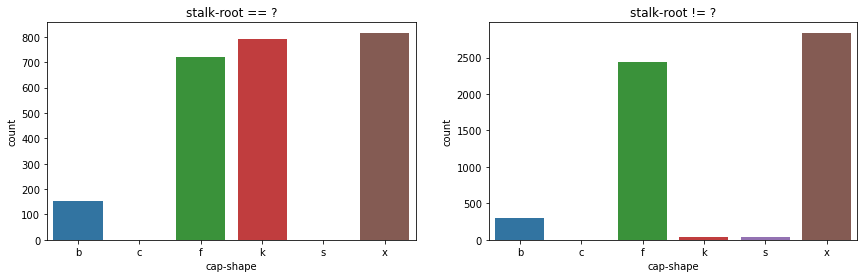

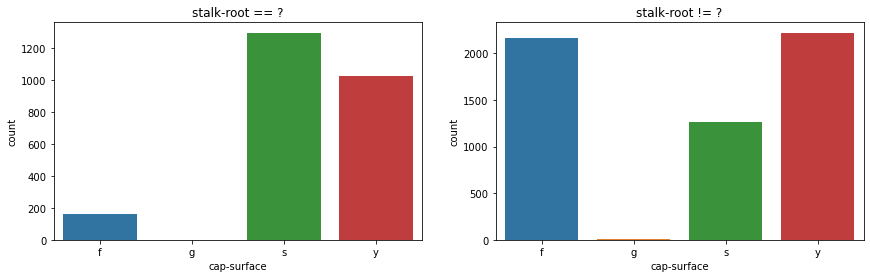

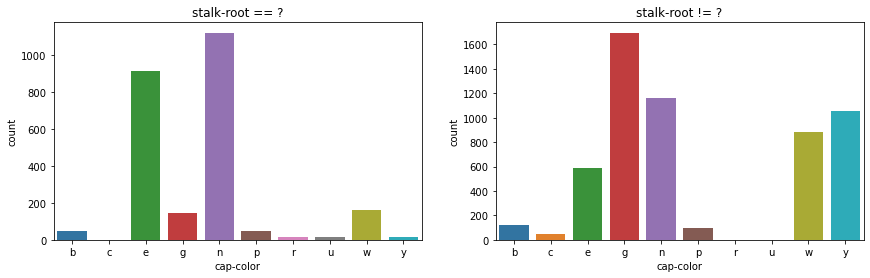

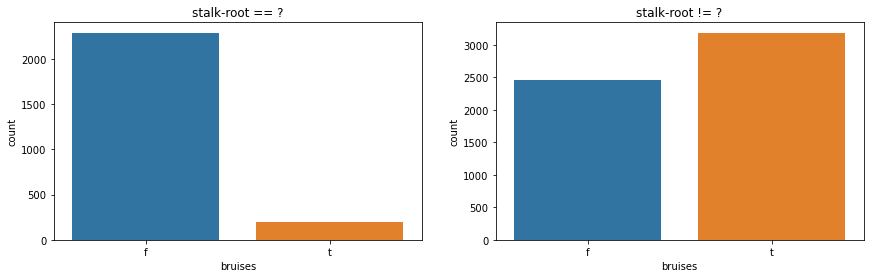

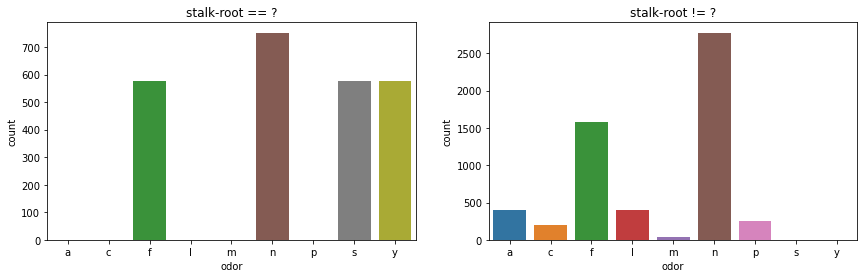

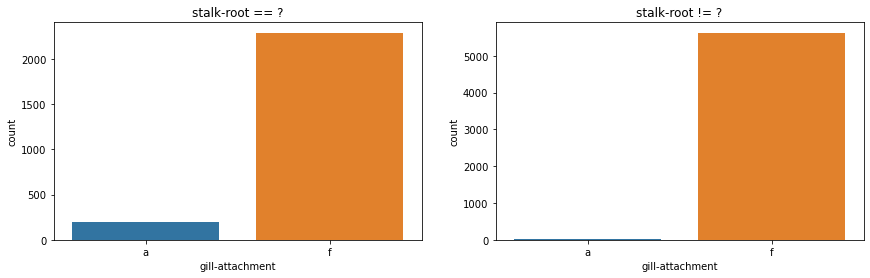

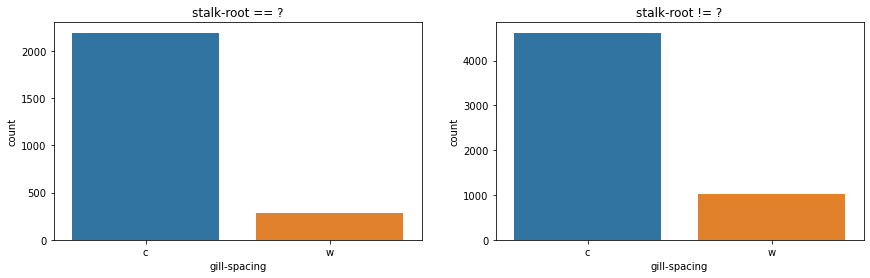

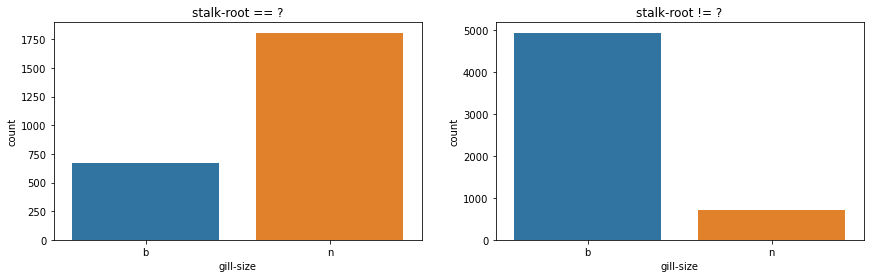

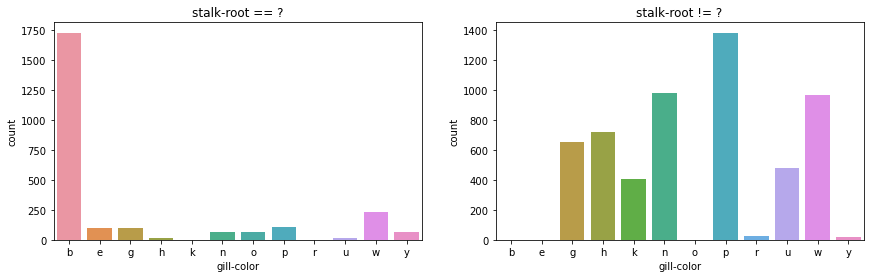

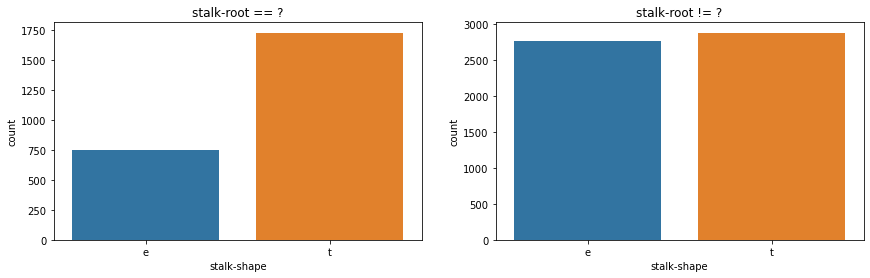

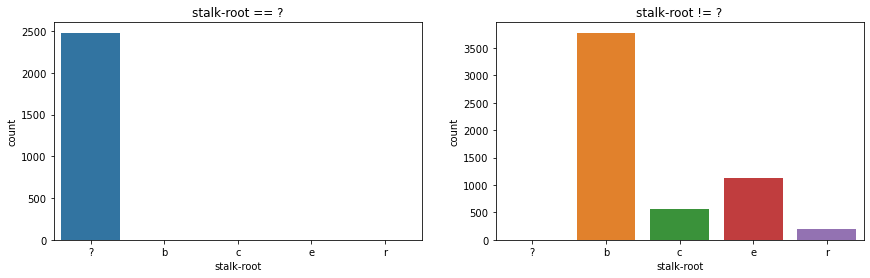

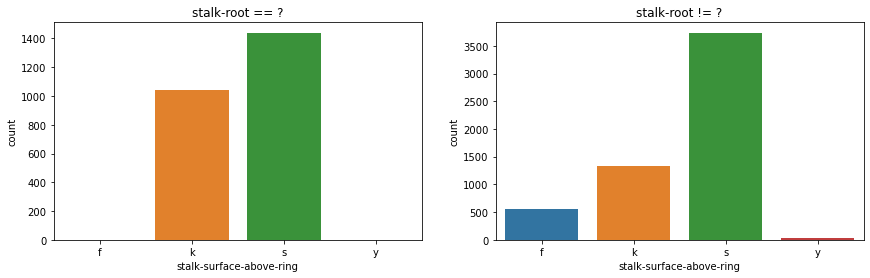

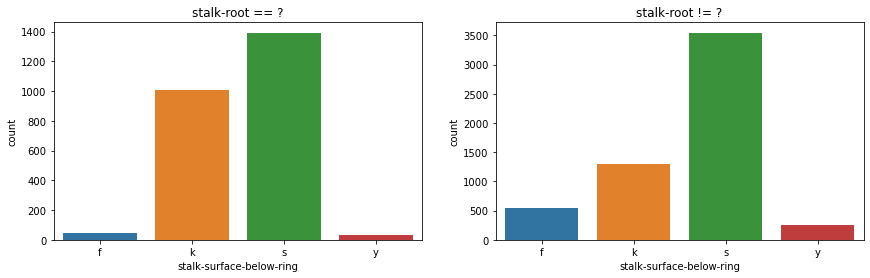

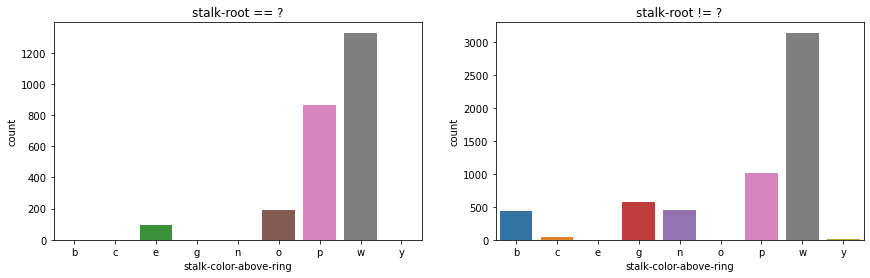

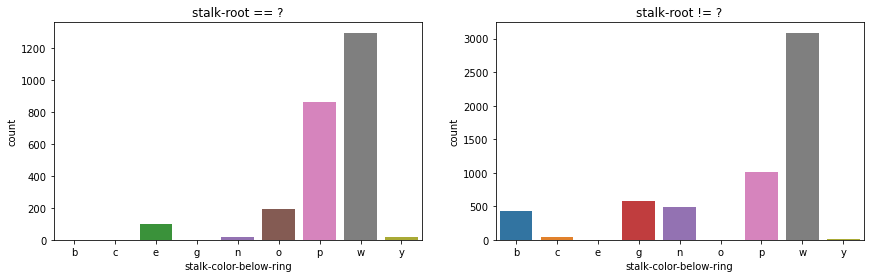

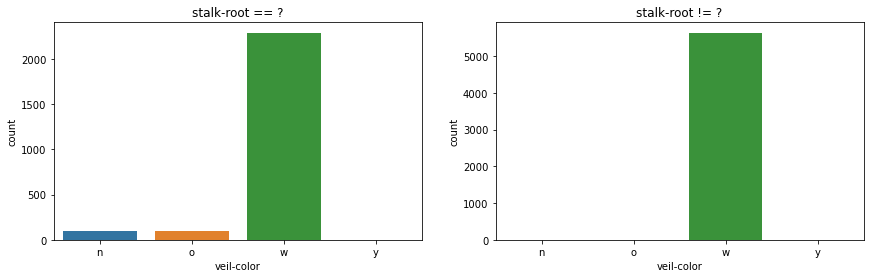

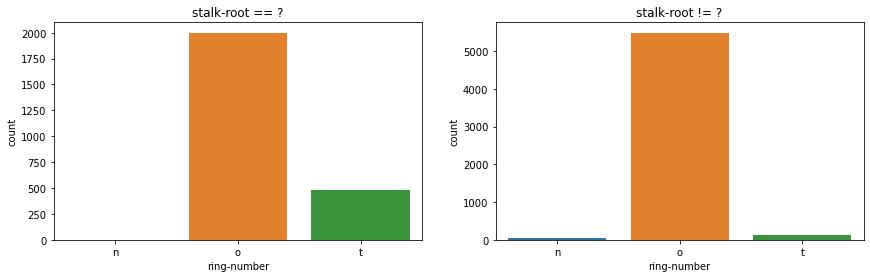

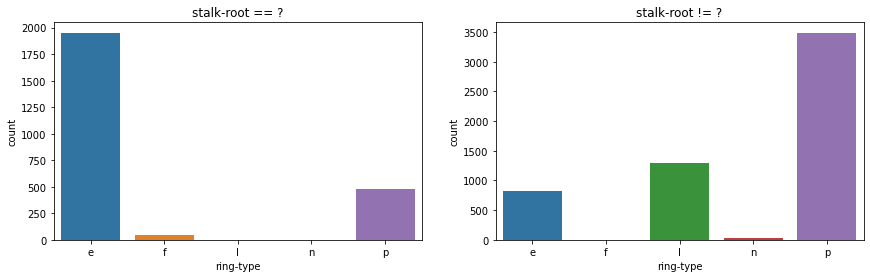

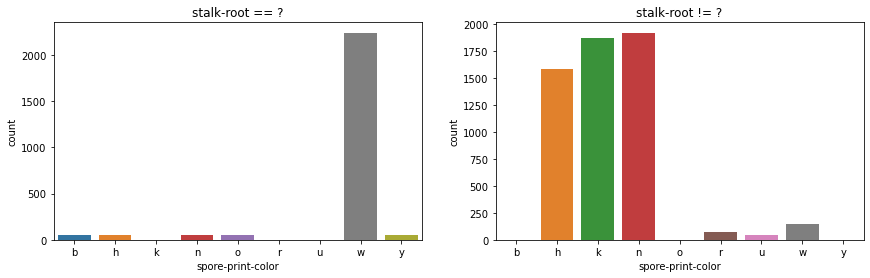

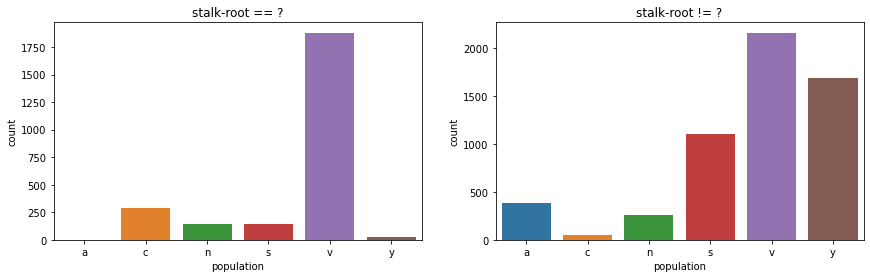

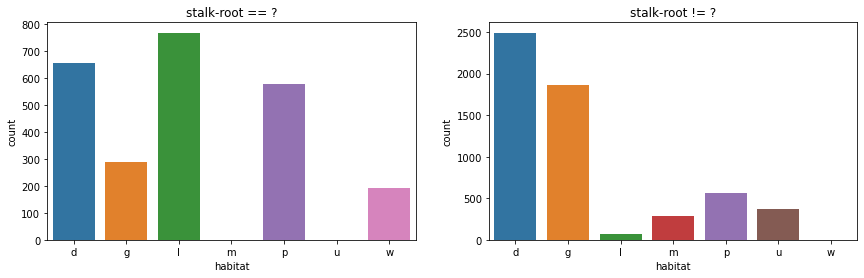

In [7]:
for attr in X.columns:
    #Format subplots
    fig, ax = plt.subplots(1,2)
    plt.subplots_adjust(right=2)
    
    #Construct values to count in each column
    a=set(X[X['stalk-root']=='?'][attr])
    b=set(X[X['stalk-root']!='?'][attr])
    c = a.union(b)
    c = np.sort(np.array(list(c)))
    
    #Build each subplot
    sns.countplot(x=X[X['stalk-root']=='?'][attr], order=c, ax=ax[0]).set_title('stalk-root == ?')
    sns.countplot(x=X[X['stalk-root']!='?'][attr], order=c, ax=ax[1]).set_title('stalk-root != ?')
    
    #Plot the plots
    fig.show()

Since many of the distributions vary greatly, and because

In [8]:
print( (len(X[X['stalk-root']=='?']) / len(X))*100, '%', sep='') 

30.526834071885773%


of the mushrooms have the value **'?'** for their `stalk-root`, we will not impute the **'?'** values, rather, we will encode them just as we would the rest of the values in that column.

<a id="5">
## 5. Encoding:

We'll use a simple binary encoding for variables that hold only 2 possible values, and a [one-hot-encoding](https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding) for variables that hold 3 or more possible values.

In [9]:
#For columns with only two values
for col in X.columns:
    if len(X[col].value_counts()) == 2:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

In [10]:
X.head()

cap-shape cap-surface cap-color  bruises odor  gill-attachment  \
0         x           s         n        1    p                1   
1         x           s         y        1    a                1   
2         b           s         w        1    l                1   
3         x           y         w        1    p                1   
4         x           s         g        0    n                1   

   gill-spacing  gill-size gill-color  stalk-shape  ...  \
0             0          1          k            0  ...   
1             0          0          k            0  ...   
2             0          0          n            0  ...   
3             0          1          n            0  ...   
4             1          0          k            1  ...   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1                        s                        s                      w   
2                        s                        s                      w   
3                        s                        s                      w   
4                        s                        s                      w   

  stalk-color-below-ring veil-color ring-number ring-type spore-print-color  \
0                      w          w           o         p                 k   
1                      w          w           o         p                 n   
2                      w          w           o         p                 n   
3                      w          w           o         p                 k   
4                      w          w           o         e                 n   

  population habitat  
0          s       u  
1          n       g  
2          n       m  
3          s       u  
4          a       g  

[5 rows x 21 columns]

And now we 'one-hot-encode' the rest of the variables:

In [11]:
X = pd.get_dummies(X)

In [12]:
X.head()

bruises  gill-attachment  gill-spacing  gill-size  stalk-shape  \
0        1                1             0          1            0   
1        1                1             0          0            0   
2        1                1             0          0            0   
3        1                1             0          1            0   
4        0                1             1          0            1   

   cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  ...  \
0            0            0            0            0            0  ...   
1            0            0            0            0            0  ...   
2            1            0            0            0            0  ...   
3            0            0            0            0            0  ...   
4            0            0            0            0            0  ...   

   population_s  population_v  population_y  habitat_d  habitat_g  habitat_l  \
0             1             0             0          0          0          0   
1             0             0             0          0          1          0   
2             0             0             0          0          0          0   
3             1             0             0          0          0          0   
4             0             0             0          0          1          0   

   habitat_m  habitat_p  habitat_u  habitat_w  
0          0          0          1          0  
1          0          0          0          0  
2          1          0          0          0  
3          0          0          1          0  
4          0          0          0          0  

[5 rows x 111 columns]

<a id="6">
## 6. Cluster Analysis:

Now before we get into building our models and testing them against eachother, I just wanted to show you, visually, the result that arises from clustering the mushroom data set.

In [13]:
#Initialize the model
kmeans = KMeans(n_clusters=2)

In [14]:
#Fit our model on the X dataset
kmeans.fit(X)

KMeans(n_clusters=2)

In [15]:
#Calculate which mushrooms fall into which clusters
clusters = kmeans.predict(X)

In [16]:
#'cluster_df' will be used as a DataFrame
#to assist in the visualization
cluster_df = pd.DataFrame()

cluster_df['cluster'] = clusters
cluster_df['class'] = y

Now let's visualize the distribution of **<font color="purple">poisonous</font>** vs. **<font color="green">edible</font>** mushrooms in each cluster.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


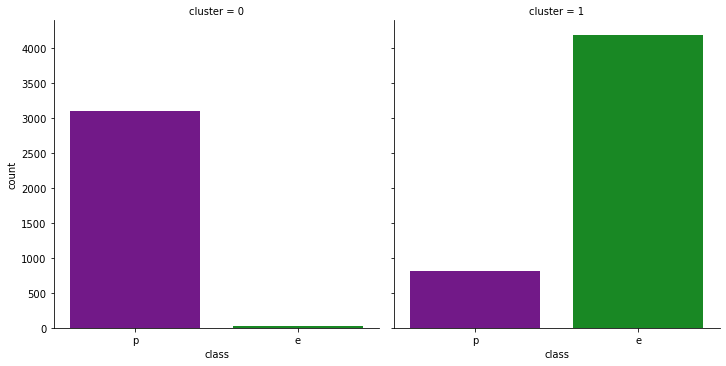

In [17]:
sns.factorplot(col='cluster', y=None, x='class', data=cluster_df, kind='count', order=['p','e'], palette=(["#7d069b","#069b15"]))

Pretty interesting, eh? One cluster mostly contains **<font color="green">edible</font>** mushrooms and the other cluster mostly contains **<font color="purple">poisonous</font>** mushrooms.

So if we were given a mushroom, and we'd like to predict whether it is **<font color="green">edible</font>** or **<font color="purple">poisonous</font>**, we could first figure out which cluster it belongs to and then make our prediction based off of the percentage of **<font color="purple">poisonous</font>** vs. **<font color="green">edible</font>** mushrooms in that cluster.

Okay! Now that you have seen how clustering can be used as a classifier for this problem, it's time to get into our testing.

<a id="7">
## 7. Classification:

But first, we need to encode our `y`-labels numerically so that our model can work with it.

Since each mushroom is either **<font color="purple">poisonous</font>** or **<font color="green">edible</font>**, we will use another simple binary encoding like before:

In [18]:
le = LabelEncoder()
y = le.fit_transform(y)

y

array([1, 0, 0, ..., 0, 1, 0])

So, when `y==1`, the mushroom is **<font color="purple">poisonous</font>**, and when `y==0`, the mushroom is **<font color="green">edible</font>**.

### Generate 'training' and 'test' sets:

We will use sklearn's [`train_test_split()`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to generate our 'training' and 'test' sets

In [19]:
#Our training set will hold 80% of the data
#and the test set will hold 20% of the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20)

### Initialize our models:

In [20]:
#K-Means Clustering with two clusters
kmeans = KMeans(n_clusters=2)

#Logistic Regression with no special parameters
logreg = LogisticRegression()

### Fit our models:

In [21]:
kmeans.fit(train_X)#Note that kmeans is unlabeled...

logreg.fit(train_X, train_y)#... while logreg IS labeled

LogisticRegression()

### Make our predictions on the 'test' set:

In [22]:
kmeans_pred = kmeans.predict(test_X)

logreg_pred = logreg.predict(test_X)

### A little thing about clustering:

One interesting aspect of K-Means clustering is that it does not always give the same results.

For example, if we were to run `kmeans.fit(train_X)` multiple times: part of the times, the majority of the **<font color="purple">poisonous</font>** mushrooms will fall into *cluster 0*, and the majority of the **<font color="green">edible</font>** mushrooms will fall into *cluster 1* - and on the other times: vice versa! In fact, if you'd like to observe this phenomenon yourself: fork this kernel and run the code blocks under the [Cluster Analysis](#6) section a few times.

In order to get around this problem, we will build a second set of predictions from our K-Means model - `kmeans_pred_2`. This second set of predictions will simply be the [bit-wise complement](https://en.wikipedia.org/wiki/Bitwise_operation#NOT) of `kmeans_pred`, and we will use whichever set of predictions gives us a better score as our final prediction set for the K-Means model!

In [23]:
kmeans_pred_2 = []
for x in kmeans_pred:
    if x == 1:
        kmeans_pred_2.append(0)
    elif x == 0:
        kmeans_pred_2.append(1)
        
kmeans_pred_2 = np.array(kmeans_pred_2)

Now, we'll figure out which set of predictions for K-Means we'd like to use.

We'll use scikit-learn's [`accuracy_score()`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) function to help us decide:

In [24]:
if accuracy_score(kmeans_pred, test_y, normalize=False) < accuracy_score(kmeans_pred_2, test_y, normalize=False):
    kmeans_pred = kmeans_pred_2

<a id="8">
## 8. Model Evaluation:

Now for the payoff: let's see which model performed better on the test-set!

We will determine which model did better by visualizing the amount of predictions that were made correctly vs.  made incorrectly by each model.
And to help us visualize the results, we will build a pandas DataFrame, that we can use to help us make the plot with seaborn.

In [25]:
#This DataFrame will allow us to visualize our results.
result_df = pd.DataFrame()

#The column containing the correct class for each mushroom in the test set, 'test_y'.
result_df['test_y'] = np.array(test_y) #(don't wanna make that mistake again!)

#The predictions made by K-Means on the test set, 'test_X'.
result_df['kmeans_pred'] = kmeans_pred
#The column below will tell us whether each prediction made by our K-Means model was correct.
result_df['kmeans_correct'] = result_df['kmeans_pred'] == result_df['test_y']

#The predictions made by Logistic Regression on the test set, 'test_X'.
result_df['logreg_pred'] = logreg_pred
#The column below will tell us whether each prediction made by our Logistic Regression model was correct.
result_df['logreg_correct'] = result_df['logreg_pred'] == result_df['test_y']

<ipython-input-26-56269c0cd870>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


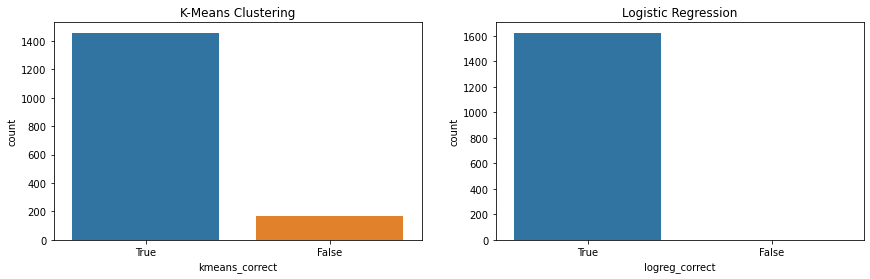

In [26]:
fig, ax = plt.subplots(1,2)
plt.subplots_adjust(right=2)
sns.countplot(x=result_df['kmeans_correct'], order=[True,False], ax=ax[0]).set_title('K-Means Clustering')
sns.countplot(x=result_df['logreg_correct'], order=[True,False], ax=ax[1]).set_title('Logistic Regression')
fig.show()

<a id="9">
## 9. Verdict:

Judging from the plots above, I'd say that **Logistic Regression** is the clear winner!

But K-Means Clustering didn't do too bad either; especially when you consider the fact that it's not built for the task of supervised learning, like Logistic Regression is!

<a id="10">
## 10. Closing Remarks:

I wasn't sure how this exercsie would turn out at first, but I'm glad to have gone through with it, because it was a ton of fun and I learned a bunch in the process!

If you've got any feedback for me: please leave a comment below, as I'd love to hear what you've got to say.
And if you found this kernel to be interesting or useful to you, please consider giving it an upvote - I'd appreciate it very much :)

Also, special thanks to [Konstantin](https://www.kaggle.com/konstantinmasich) for helping me resolve a very difficult problem I had during the development of this kernel.

Cheers!
-*Josh*